## Data loading

### Subtask:
Load the "device.csv" file into a Pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv('device.csv')
display(df.head())

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


## Data wrangling

### Subtask:
Prepare the data for analysis by converting the timestamp column to datetime objects, extracting day of the week and hour, and creating a new column indicating weekend logins.


In [ ]:
df['Login Timestamp'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['Login Timestamp'].dt.dayofweek
df['hour'] = df['Login Timestamp'].dt.hour
df['is_weekend'] = (df['day_of_week'] == 5) | (df['day_of_week'] == 6)
df.head()

,id,date,user,pc,activity,Login Timestamp,day_of_week,hour,is_weekend
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect,2010-01-02 07:21:06,5,7,True
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect,2010-01-02 07:37:41,5,7,True
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect,2010-01-02 07:59:11,5,7,True
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect,2010-01-02 07:59:49,5,7,True
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect,2010-01-02 08:04:26,5,8,True


## Data analysis

### Subtask:
Analyze the number of logins per user on weekends and the number of logins per user per hour throughout the day.


In [ ]:
# Weekend logins
weekend_logins_per_user = df[df['is_weekend']].groupby('user').size()

# Hourly logins
hourly_logins_per_user = df.groupby(['user', 'hour']).size()

## Data visualization

### Subtask:
Visualize the number of weekend logins for each user and the number of user logins per hour in each day.


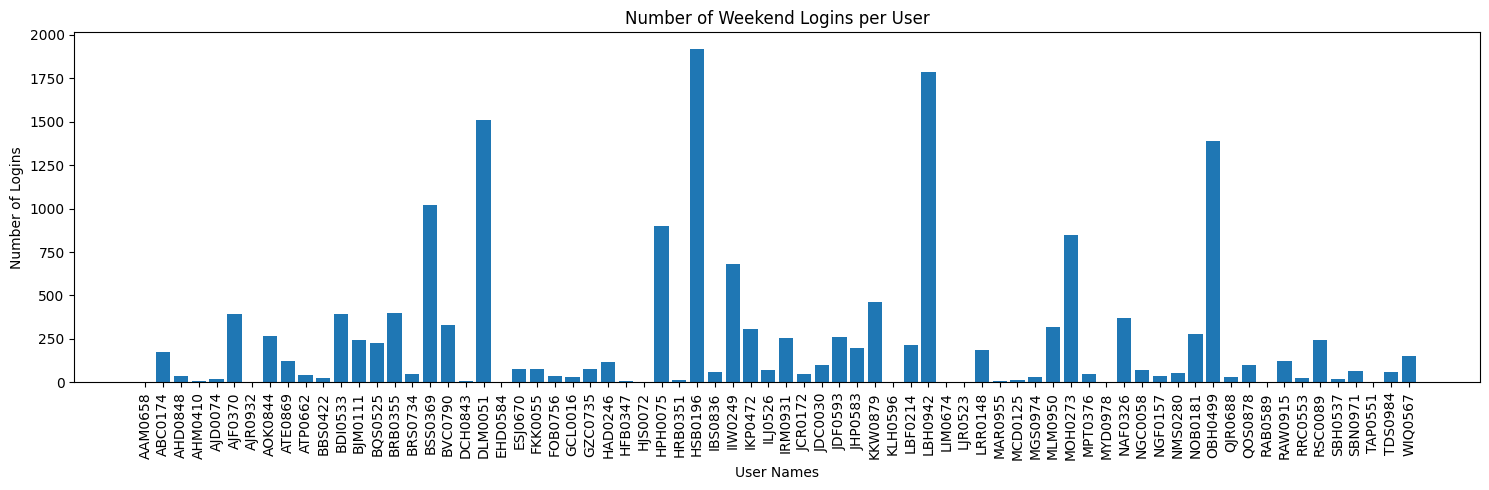

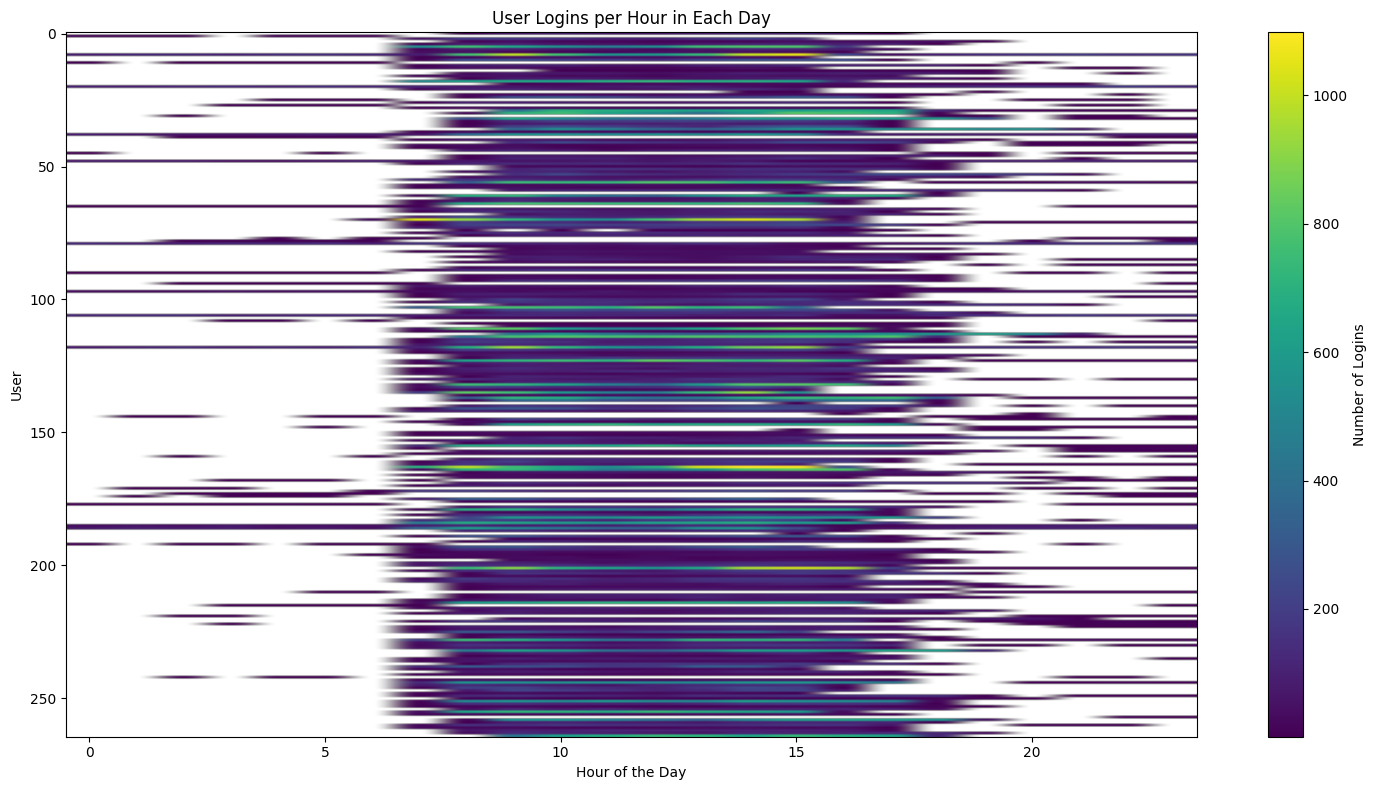

In [ ]:
import matplotlib.pyplot as plt

# Weekend Login Visualization
plt.figure(figsize=(15, 5))
plt.bar(weekend_logins_per_user.index, weekend_logins_per_user.values)
plt.xlabel("User Names")
plt.ylabel("Number of Logins")
plt.title("Number of Weekend Logins per User")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Hourly Login Visualization
hourly_logins_pivot = hourly_logins_per_user.unstack()
plt.figure(figsize=(15, 8))
plt.imshow(hourly_logins_pivot, cmap='viridis', aspect='auto')
plt.xlabel("Hour of the Day")
plt.ylabel("User")
plt.title("User Logins per Hour in Each Day")
plt.colorbar(label="Number of Logins")
plt.tight_layout()
plt.show()

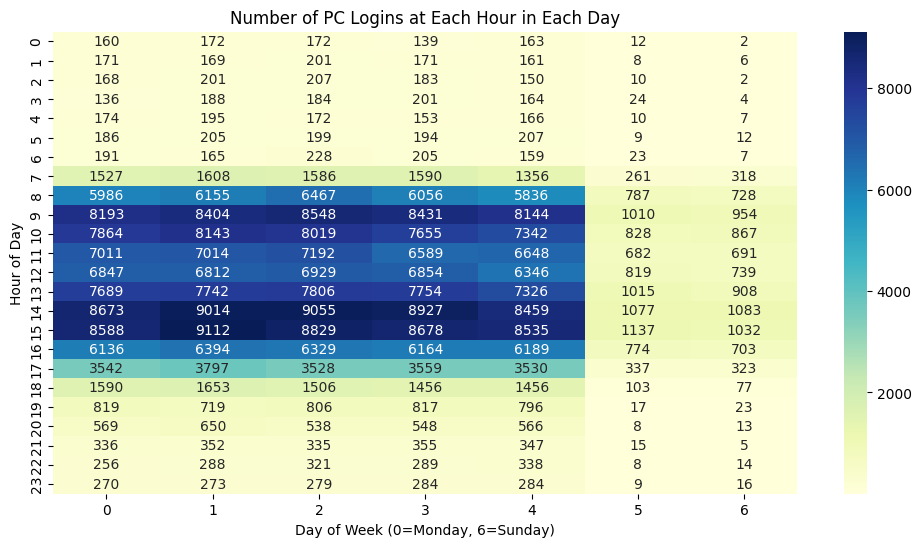

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the number of logins at each hour in each day
hourly_logins_df = df.groupby(['hour', 'day_of_week'])['id'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_logins_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Hour of Day")
plt.title("Number of PC Logins at Each Hour in Each Day")
plt.show()